## COMP 484 Lab 7
Srishan Shakya

Roll No. 46

CE


# Reinforcement Learning

- Understanding the premise
- Reinforcement learning vs. supervised learning
- Real world examples of reinforcement learning
- Building blocks of reinforcement learning
- Creating an environment
- Building a learning agent

**Reinforcement learning** refers to the process of learning what to do and mapping situations to certain actions in order to maximize the reward. In most paradigms of machine learning, a learning agent is told what actions to take in order to achieve certain results. In the case of reinforcement leaning, the learning agent is not told what actions to take. Instead, it must discover what actions yield the highest reward by trying them out.

In Reinforcement Learning, we define a *learning problem* and not a *learning method*. Characterized by two distinguishing features -- trial and error learning, and delayed reward.

## Creating an environment
Use a package called `OpenAI Gym` to build reinforcement learning agents. [Learn More](https://gym.openai.com/) [Git Link for Gym Installation](https://github.com/openai/gym#installation)

In [1]:
# import argparse
import gym
from gym import wrappers

In [2]:
# Create a mapping to names of environments as specified in OpenAI Gym package (Just for easiness)

name_map = {'cartpole': 'CartPole-v1', 
            'mountaincar': 'MountainCar-v0',
            'pendulum': 'Pendulum-v0',
            'taxi': 'Taxi-v3',
            'lake': 'FrozenLake-v0'}

In [3]:
# Function to create a gym environment
def createEnvironment(env_name):
    env = gym.make(name_map[env_name])
    env = wrappers.Monitor(env, './' + env_name + '_env', force=True)
    env.reset()
    for _ in range(1000):
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Done after", _, "iterations")
            break
    print("Observation:\n", observation)
    print("Reward:\n", reward)
    print("Done:", done)
    print("Info:\n", info)
    env.close()

In [4]:
# Creating a CARTPOLE environment
createEnvironment('cartpole') # Renders the environment in a window and outputs final result with a mp4 file to cartpole_env folder

Done after 11 iterations
Observation:
 [-0.21706254 -1.15966958  0.23846158  1.95574018]
Reward:
 1.0
Done: True
Info:
 {}


In [5]:
# Creating a MOUNTAIN CAR environment
createEnvironment('mountaincar') # Renders the environment in a window and outputs final result with a mp4 file to mountaincar_env folder

Done after 199 iterations
Observation:
 [-0.56398214 -0.00876779]
Reward:
 -1.0
Done: True
Info:
 {'TimeLimit.truncated': True}


In [6]:
# Creating a PENDULUM environment
createEnvironment('pendulum') # Renders the environment in a window and outputs final result with a mp4 file to pendulum_env folder

Done after 199 iterations
Observation:
 [0.41678855 0.90900347 1.73917529]
Reward:
 -1.298679860663328
Done: True
Info:
 {'TimeLimit.truncated': True}


In [7]:
# Creating a TAXI environment
createEnvironment('taxi') # No mp4 file output

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| 

In [8]:
# Creating a LAKE environment
createEnvironment('lake') # Returns no video, renders text output


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
Done after 7 iterations
Observation:
 7
Reward:
 0.0
Done: True
Info:
 {'prob': 0.3333333333333333}


## Building a learning agent

In [9]:
import gym
from gym import wrappers

In [10]:
# Create a mapping to names of environments as specified in OpenAI Gym package

name_map = {'cartpole': 'CartPole-v1', 
            'mountaincar': 'MountainCar-v0',
            'pendulum': 'Pendulum-v0',
            'taxi': 'Taxi-v3',
            'lake': 'FrozenLake-v0'}

In [11]:
# Function to build a learning agent
def buildLearningAgent(env_name):
    env = gym.make(name_map[env_name])
    env = wrappers.Monitor(env, './' + env_name, video_callable=lambda episode_id: True, force = True)
    env.reset()
    for i_episode in range(25):
        observation = env.reset()
        for t in range(500):
            env.render()
            print(observation)
            action = env.action_space.sample()
            observation, reward, done, info = env.step(action)
            if done:
                print("Episode", i_episode, "finished after", t+1, "timesteps")
                break
    env.close()
    print("Observation:\n", observation)
    print("Reward:\n", reward)
    print("Done:", done)
    print("Info:\n", info)

In [12]:
# CARTPOLE environment
env_name = 'cartpole' # Change name to 'cartpole', 'mountaincar', 'pendulum', 'taxi' or 'lake' for different results

# Build a learning agent for CARTPOLE
infix = buildLearningAgent(env_name)

[ 0.01608258  0.04449768 -0.03884389  0.03756848]
[ 0.01697253  0.2401545  -0.03809252 -0.26711261]
[ 0.02177562  0.04559632 -0.04343477  0.01331647]
[ 0.02268755 -0.14887667 -0.04316844  0.29198503]
[ 0.01971001  0.04683335 -0.03732874 -0.0139941 ]
[ 0.02064668  0.24247021 -0.03760862 -0.31821705]
[ 0.02549608  0.43810706 -0.04397296 -0.62251916]
[ 0.03425823  0.24362581 -0.05642335 -0.34400316]
[ 0.03913074  0.04935004 -0.06330341 -0.06963291]
[ 0.04011774  0.24531974 -0.06469607 -0.38159745]
[ 0.04502414  0.44129782 -0.07232802 -0.69395695]
[ 0.05385009  0.63734458 -0.08620716 -1.00850414]
[ 0.06659699  0.83350492 -0.10637724 -1.32696549]
[ 0.08326708  0.63987441 -0.13291655 -1.0693775 ]
[ 0.09606457  0.83647969 -0.1543041  -1.40064673]
[ 0.11279417  1.03314556 -0.18231703 -1.73732615]
Episode 0 finished after 16 timesteps
[-0.03264608  0.04478308  0.03764916  0.00913523]
[-0.03175042  0.23934543  0.03783187 -0.27143525]
[-0.02696351  0.43390769  0.03240316 -0.55194989]
[-0.01828535

Episode 7 finished after 14 timesteps
[-0.0208817  -0.03578702  0.01583659  0.03396422]
[-0.02159744 -0.23113245  0.01651588  0.33160139]
[-0.02622009 -0.42648555  0.0231479   0.62944652]
[-0.0347498  -0.62192275  0.03573684  0.92932866]
[-0.04718825 -0.42730096  0.05432341  0.64808676]
[-0.05573427 -0.62313596  0.06728514  0.95736916]
[-0.06819699 -0.42898017  0.08643253  0.68656138]
[-0.0767766  -0.23515761  0.10016375  0.42229237]
[-0.08147975 -0.04158679  0.1086096   0.1627904 ]
[-0.08231148  0.15182628  0.11186541 -0.09375127]
[-0.07927496 -0.04470647  0.10999038  0.23202512]
[-0.08016909  0.14868601  0.11463089 -0.02403863]
[-0.07719537 -0.04787732  0.11415011  0.30249904]
[-0.07815291 -0.24442542  0.12020009  0.62888977]
[-0.08304142 -0.05116781  0.13277789  0.37634878]
[-0.08406478 -0.2479011   0.14030487  0.70777333]
[-0.0890228  -0.05497275  0.15446033  0.46233897]
[-0.09012226 -0.25190169  0.16370711  0.79944661]
[-0.09516029 -0.44884533  0.17969604  1.13882754]
[-0.1041372 

[ 0.00369934  0.24966477 -0.17574136 -0.96427037]
[ 0.00869263  0.44665632 -0.19502676 -1.30660877]
Episode 16 finished after 37 timesteps
[ 0.01878276 -0.03845268  0.015314   -0.0084319 ]
[ 0.01801371  0.15644633  0.01514536 -0.296244  ]
[ 0.02114264  0.35134914  0.00922048 -0.58411212]
[ 0.02816962  0.54634072 -0.00246177 -0.87387627]
[ 0.03909643  0.74149605 -0.01993929 -1.16733214]
[ 0.05392635  0.9368717  -0.04328593 -1.46619912]
[ 0.07266379  1.1324961  -0.07260992 -1.77208295]
[ 0.09531371  0.93826436 -0.10805158 -1.5028316 ]
[ 0.114079    0.74460717 -0.13810821 -1.24574527]
[ 0.12897114  0.55150017 -0.16302311 -0.99931771]
[ 0.14000114  0.7483813  -0.18300947 -1.33844056]
Episode 17 finished after 11 timesteps
[ 0.04699937  0.04823671 -0.04754246  0.01989972]
[ 0.04796411  0.24400709 -0.04714447 -0.28739626]
[ 0.05284425  0.43976855 -0.05289239 -0.59456753]
[ 0.06163962  0.63558936 -0.06478374 -0.90343108]
[ 0.07435141  0.83152617 -0.08285237 -1.21575287]
[ 0.09098193  0.637564

[-0.02443475  0.22729554  0.09062842 -0.0391025 ]
[-0.01988884  0.03099874  0.08984637  0.28074262]
[-0.01926887  0.22473186  0.09546122  0.01769437]
[-0.01477423  0.41836437  0.09581511 -0.243409  ]
[-0.00640694  0.22201371  0.09094693  0.07789264]
[-0.00196667  0.02571364  0.09250478  0.39782738]
[-0.00145239  0.21940982  0.10046133  0.13568297]
[ 0.0029358   0.41296003  0.10317499 -0.12369255]
[0.011195   0.21652288 0.10070114 0.19967591]
[0.01552546 0.02011563 0.10469466 0.52235039]
[0.01592777 0.21362024 0.11514167 0.2644068 ]
[0.02020018 0.40692659 0.1204298  0.01014414]
[0.02833871 0.21030182 0.12063268 0.33826593]
[0.03254475 0.40351915 0.127398   0.08592624]
[ 0.04061513  0.59660658  0.12911653 -0.16400391]
[ 0.05254726  0.7896665   0.12583645 -0.41332839]
[ 0.06834059  0.59300644  0.11756988 -0.08377241]
[0.08020072 0.39641259 0.11589443 0.24356859]
[ 0.08812897  0.58970486  0.12076581 -0.0104281 ]
[ 0.09992307  0.78290648  0.12055724 -0.2627009 ]
[0.1155812  0.58628845 0.115

In [13]:
env_name = 'mountaincar'

# Build a learning agent for MOUNTAIN CAR
buildLearningAgent(env_name)

[-0.4647332  0.       ]
[-4.65172403e-01 -4.39200621e-04]
[-4.65047561e-01  1.24841913e-04]
[-4.65359598e-01 -3.12037491e-04]
[-4.65106211e-01  2.53387567e-04]
[-4.65289269e-01 -1.83058725e-04]
[-4.64907422e-01  3.81846906e-04]
[-0.46396349  0.00094393]
[-0.46246444  0.00149905]
[-4.62421331e-01  4.31087786e-05]
[-0.46383448 -0.00141315]
[-0.46569347 -0.00185899]
[-0.46798456 -0.00229109]
[-0.47069083 -0.00270627]
[-0.47479224 -0.00410141]
[-0.4802584  -0.00546616]
[-0.48604869 -0.00579029]
[-0.49312002 -0.00707132]
[-0.50041961 -0.0072996 ]
[-0.50789291 -0.0074733 ]
[-0.51548396 -0.00759105]
[-0.52213587 -0.00665191]
[-0.52979875 -0.00766288]
[-0.53841513 -0.00861638]
[-0.54692042 -0.00850529]
[-0.55625095 -0.00933052]
[-0.56533697 -0.00908602]
[-0.57411078 -0.00877381]
[-0.58150719 -0.00739641]
[-0.58747147 -0.00596428]
[-0.59195964 -0.00448816]
[-0.59593868 -0.00397904]
[-0.59937942 -0.00344074]
[-0.60225669 -0.00287727]
[-0.60454949 -0.0022928 ]
[-0.6062411  -0.00169162]
[-0.607319

[-0.52390341 -0.00944414]
[-0.53234527 -0.00844186]
[-0.53972153 -0.00737627]
[-0.54697692 -0.00725539]
[-0.55405712 -0.0070802 ]
[-0.5619092  -0.00785208]
[-0.56947459 -0.00756538]
[-0.57669699 -0.0072224 ]
[-0.58452283 -0.00782585]
[-0.59189429 -0.00737146]
[-0.5987571  -0.00686282]
[-0.604061   -0.00530389]
[-0.60976726 -0.00570627]
[-0.61583444 -0.00606718]
[-0.62021865 -0.00438421]
[-0.62288831 -0.00266966]
[-0.62382426 -0.00093595]
[-0.6250198  -0.00119554]
[-6.24466359e-01  5.53438946e-04]
[-0.62216791  0.00229845]
[-0.61914091  0.00302699]
[-0.61540712  0.00373379]
[-0.61099344  0.00441368]
[-0.60693179  0.00406166]
[-0.60325162  0.00368016]
[-0.59797973  0.00527189]
[-0.5931546   0.00482513]
[-0.58681158  0.00634302]
[-0.5789973   0.00781428]
[-0.57176944  0.00722786]
[-0.56518156  0.00658788]
[-0.55728261  0.00789895]
[-0.55013147  0.00715114]
[-0.54378154  0.00634993]
[-0.53728033  0.00650121]
[-0.53167654  0.00560379]
[-0.52701217  0.00466437]
[-0.5213222   0.00568997]
[-0.

[-0.54654141  0.00091768]
[-0.54445179  0.00208962]
[-0.54220588  0.00224591]
[-0.54082049  0.00138539]
[-0.53830599  0.0025145 ]
[-0.53668123  0.00162477]
[-0.53395837  0.00272286]
[-0.53215783  0.00180054]
[-0.5292931   0.00286473]
[-0.52738566  0.00190743]
[-0.52544983  0.00193584]
[-0.52250011  0.00294972]
[-0.51855863  0.00394148]
[-0.51365495  0.00490368]
[-0.50882584  0.00482911]
[-0.50510749  0.00371835]
[-0.50152775  0.00357974]
[-0.49811343  0.00341433]
[-0.49389006  0.00422337]
[-0.48988921  0.00400085]
[-0.48714075  0.00274846]
[-0.48566518  0.00147557]
[-0.4834735   0.00219168]
[-0.48158203  0.00189147]
[-0.47900485  0.00257718]
[-0.47776114  0.00124372]
[-0.47686012  0.00090102]
[-4.77308492e-01 -4.48374104e-04]
[-0.47810293 -0.00079444]
[-0.47923753 -0.0011346 ]
[-0.48070385 -0.00146632]
[-0.482491   -0.00178715]
[-0.48458568 -0.00209468]
[-0.48597228 -0.00138661]
[-0.48864049 -0.00266821]
[-0.49057041 -0.00192991]
[-0.49174763 -0.00117722]
[-0.49316337 -0.00141574]
[-0.

[-0.4333476  -0.00913094]
[-0.44414718 -0.01079958]
[-0.45453703 -0.01038984]
[-0.46644114 -0.01190411]
[-0.47977183 -0.01333069]
[-0.49243028 -0.01265845]
[-0.50432216 -0.01189187]
[-0.51735853 -0.01303637]
[-0.53044169 -0.01308317]
[-0.54447354 -0.01403185]
[-0.55934893 -0.01487539]
[-0.57395671 -0.01460778]
[-0.58818824 -0.01423153]
[-0.60093837 -0.01275013]
[-0.61411365 -0.01317528]
[-0.62561838 -0.01150473]
[-0.63736985 -0.01175147]
[-0.6482845  -0.01091466]
[-0.65828567 -0.01000117]
[-0.66730395 -0.00901828]
[-0.67427753 -0.00697357]
[-0.6791591  -0.00488158]
[-0.68291586 -0.00375676]
[-0.68652272 -0.00360686]
[-0.68995573 -0.00343301]
[-0.69219221 -0.00223648]
[-0.69321747 -0.00102526]
[-0.69402478 -0.00080731]
[-0.69260886  0.00141592]
[-0.68897898  0.00362988]
[-0.68515901  0.00381997]
[-0.67917423  0.00598478]
[-0.67306453  0.00610969]
[-0.66687103  0.0061935 ]
[-0.65863578  0.00823526]
[-0.65041521  0.00822056]
[-0.64226631  0.00814891]
[-0.63424608  0.00802023]
[-0.62641115

[-7.46286574e-01  9.15536984e-05]
[-0.74364635  0.00264022]
[-0.73947306  0.00417329]
[-0.73379153  0.00568153]
[-0.72663598  0.00715556]
[-0.71905007  0.0075859 ]
[-0.70908085  0.00996922]
[-0.6987912   0.01028965]
[-0.68824727  0.01054393]
[-0.67551808  0.01272919]
[-0.66268853  0.01282955]
[-0.64984581  0.01284271]
[-0.63607872  0.01376709]
[-0.62048395  0.01559477]
[-0.60517273  0.01531122]
[-0.58925579  0.01591694]
[-0.5728496   0.01640619]
[-0.55607538  0.01677423]
[-0.53805796  0.01801742]
[-0.51893213  0.01912583]
[-0.50084131  0.01809083]
[-0.48392103  0.01692028]
[-0.46629763  0.0176234 ]
[-0.45010188  0.01619575]
[-0.43445289  0.01564898]
[-0.41846456  0.01598833]
[-0.40225173  0.01621283]
[-0.38592904  0.0163227 ]
[-0.36960976  0.01631928]
[-0.35340475  0.016205  ]
[-0.33942146  0.01398329]
[-0.32675028  0.01267118]
[-0.31547113  0.01127915]
[-0.30465348  0.01081765]
[-0.29536236  0.00929112]
[-0.28665236  0.00871   ]
[-0.27857354  0.00807882]
[-0.27317132  0.00540222]
[-0.

[-0.46896744  0.00082575]
[-0.4695496  -0.00058215]
[-0.47053534 -0.00098575]
[-4.70917383e-01 -3.82042234e-04]
[-0.47269289 -0.00177551]
[-0.47384871 -0.00115582]
[-0.47637628 -0.00252756]
[-0.48025683 -0.00388055]
[-0.48346152 -0.0032047 ]
[-0.48596652 -0.002505  ]
[-0.48975317 -0.00378664]
[-0.49479322 -0.00504005]
[-0.50004904 -0.00525582]
[-0.50648134 -0.0064323 ]
[-0.51304196 -0.00656062]
[-0.51868175 -0.00563979]
[-0.52335841 -0.00467666]
[-0.52803687 -0.00467846]
[-0.53368205 -0.00564518]
[-0.53825162 -0.00456957]
[-0.54271133 -0.00445971]
[-0.54702777 -0.00431644]
[-0.55016863 -0.00314087]
[-0.55311044 -0.0029418 ]
[-0.5568312  -0.00372076]
[-0.55930312 -0.00247193]
[-0.56050778 -0.00120465]
[-0.56143618 -0.0009284 ]
[-0.56208141 -0.00064523]
[-5.62438662e-01 -3.57252170e-04]
[-0.56150527  0.00093339]
[-0.5592882   0.00221707]
[-0.55780396  0.00148423]
[-0.55606364  0.00174032]
[-0.55308022  0.00298342]
[-0.55087597  0.00220425]
[-0.54846737  0.0024086 ]
[-0.54587243  0.002594

[-0.44904077 -0.0005191 ]
[-0.4511144  -0.00207363]
[-0.45372739 -0.00261299]
[-0.45586059 -0.0021332 ]
[-0.45949833 -0.00363774]
[-0.46461387 -0.00511554]
[-0.47116949 -0.00655562]
[-0.47811671 -0.00694722]
[-0.48640399 -0.00828728]
[-0.49496965 -0.00856566]
[-0.50474977 -0.00978012]
[-0.51467118 -0.00992141]
[-0.52365954 -0.00898836]
[-0.53364744 -0.0099879 ]
[-0.54255999 -0.00891255]
[-0.5523304  -0.00977042]
[-0.5618856 -0.0095552]
[-0.57015427 -0.00826868]
[-0.57807491 -0.00792064]
[-0.5855888  -0.00751389]
[-0.59164044 -0.00605164]
[-0.5971853  -0.00554486]
[-0.60318274 -0.00599744]
[-0.60858895 -0.00540621]
[-0.61436462 -0.00577567]
[-0.62046792 -0.00610331]
[-0.62485489 -0.00438697]
[-0.62849407 -0.00363917]
[-0.63035945 -0.00186538]
[-0.63243774 -0.00207829]
[-0.63371417 -0.00127643]
[-6.33179674e-01  5.34496798e-04]
[-0.63083804  0.00234163]
[-0.62670592  0.00413212]
[-0.62181277  0.00489315]
[-0.61719362  0.00461915]
[-0.6108817   0.00631192]
[-0.60392262  0.00695909]
[-0.59

[-0.5032432   0.00191464]
[-0.50248113  0.00076207]
[-0.50187734  0.0006038 ]
[-0.50043634  0.001441  ]
[-5.00168915e-01  2.67421508e-04]
[-0.50107707 -0.00090816]
[-0.50215402 -0.00107694]
[-5.02391682e-01 -2.37666841e-04]
[-0.50378829 -0.00139661]
[-0.5043334 -0.0005451]
[-5.04022913e-01  3.10486183e-04]
[-5.03859161e-01  1.63751591e-04]
[-0.50284337  0.00101579]
[-0.50098314  0.00186023]
[-0.50029241  0.00069074]
[-0.49977632  0.00051608]
[-0.50043875 -0.00066243]
[-0.50127475 -0.00083599]
[-0.50327805 -0.0020033 ]
[-0.50643366 -0.00315561]
Episode 10 finished after 200 timesteps
[-0.58982337  0.        ]
[-5.90329950e-01 -5.06576538e-04]
[-0.59133938 -0.00100943]
[-5.91844243e-01 -5.04864356e-04]
[-5.91840835e-01  3.40833027e-06]
[-0.59032918  0.00151166]
[-0.58832038  0.0020088 ]
[-0.58582922  0.00249117]
[-0.58387403  0.00195519]
[-0.58046924  0.00340479]
[-0.57563998  0.00482925]
[-0.569422    0.00621798]
[-0.56286143  0.00656057]
[-0.55700707  0.00585436]
[-0.54990256  0.007104

[-0.35679217  0.01961255]
[-0.3373791   0.01941307]
[-0.31929116  0.01808794]
[-0.30264137  0.01664979]
[-0.28753004  0.01511133]
[-0.27404489  0.01348515]
[-0.26126138  0.0127835 ]
[-0.2492485   0.01201289]
[-0.23906867  0.01017983]
[-0.23077296  0.00829571]
[-0.22440167  0.00637129]
[-0.22098494  0.00341673]
[-0.21853866  0.00244628]
[-0.21807406  0.0004646 ]
[-0.22059326 -0.0025192 ]
[-0.22608471 -0.00549145]
[-0.23452284 -0.00843813]
[-0.24386731 -0.00934447]
[-0.25607205 -0.01220473]
[-0.27007466 -0.01400261]
[-0.28680061 -0.01672595]
[-0.3061569  -0.01935629]
[-0.32603077 -0.01987388]
[-0.34730116 -0.02127039]
[-0.370833   -0.02353184]
[-0.39647089 -0.02563789]
[-0.42403929 -0.0275684 ]
[-0.45134334 -0.02730405]
[-0.47818506 -0.02684173]
[-0.50536634 -0.02718128]
[-0.53168429 -0.02631795]
[-0.55694161 -0.02525732]
[-0.58094927 -0.02400766]
[-0.60452893 -0.02357965]
[-0.62750755 -0.02297862]
[-0.64971942 -0.02221187]
[-0.67000779 -0.02028837]
[-0.68823306 -0.01822527]
[-0.70527316

[-0.54818623  0.        ]
[-0.54700199  0.00118424]
[-0.54564237  0.00135962]
[-0.54411755  0.00152483]
[-0.54143893  0.00267862]
[-0.53862657  0.00281236]
[-0.53570155  0.00292503]
[-0.53268577  0.00301578]
[-0.53060185  0.00208392]
[-0.52846541  0.00213644]
[-0.52529247  0.00317294]
[-0.52210683  0.00318564]
[-0.51893238  0.00317445]
[-0.51579292  0.00313946]
[-0.512712    0.00308092]
[-0.50871272  0.00399928]
[-0.50582505  0.00288767]
[-0.50407062  0.00175443]
[-0.50346256  0.00060805]
[-5.03005439e-01  4.57125116e-04]
[-0.50370267 -0.00069723]
[-0.50554902 -0.00184636]
[-0.50853069 -0.00298167]
[-0.51062533 -0.00209464]
[-0.51281724 -0.00219191]
[-0.51509    -0.00227276]
[-0.51842658 -0.00333657]
[-0.52180194 -0.00337536]
[-0.52619077 -0.00438884]
[-0.52956017 -0.0033694 ]
[-0.53188486 -0.00232469]
[-0.53314741 -0.00126255]
[-0.53433835 -0.00119094]
[-5.34448765e-01 -1.10411824e-04]
[-0.53347782  0.00097095]
[-0.53243279  0.00104503]
[-0.53132151  0.00111128]
[-0.53015231  0.001169

[-0.56009794 -0.00131   ]
[-0.56113474 -0.0010368 ]
[-0.56289062 -0.00175587]
[-0.56435249 -0.00146187]
[-5.64509463e-01 -1.56975874e-04]
[-0.56336038  0.00114908]
[-5.62913788e-01  4.46589873e-04]
[-0.56217302  0.00074077]
[-5.62143588e-01  2.94308401e-05]
[-0.56282572 -0.00068213]
[-0.56421432 -0.0013886 ]
[-0.56629906 -0.00208474]
[-0.56806442 -0.00176536]
[-5.68497281e-01 -4.32858926e-04]
[-0.56759442  0.00090286]
[-5.67362545e-01  2.31872665e-04]
[-5.66803387e-01  5.59158783e-04]
[-0.5659211   0.00088229]
[-5.65722248e-01  1.98852134e-04]
[-5.66208310e-01 -4.86062018e-04]
[-0.56737567 -0.00116736]
[-5.67215646e-01  1.60023593e-04]
[-5.67729429e-01 -5.13782583e-04]
[-0.5689132  -0.00118377]
[-0.56975815 -0.00084496]
[-5.69258020e-01  5.00133559e-04]
[-5.69416512e-01 -1.58491977e-04]
[-5.69232452e-01  1.84060004e-04]
[-0.56770721  0.00152524]
[-0.56485211  0.00285509]
[-0.56268841  0.0021637 ]
[-0.56023221  0.0024562 ]
[-0.5565018  0.0037304]
[-0.55352503  0.00297677]
[-0.54932411  

[-0.47029073  0.00095937]
[-0.46872947  0.00156126]
[-0.46657787  0.0021516 ]
[-0.46385185  0.00272602]
[-0.46157153  0.00228032]
[-0.45975374  0.00181779]
[-4.59411861e-01  3.41876777e-04]
[-0.46054842 -0.00113656]
[-0.46115504 -0.00060662]
[-4.61227247e-01 -7.22121950e-05]
[-0.46176452 -0.00053727]
[-0.4627629  -0.00099838]
[-0.46421501 -0.00145212]
[-0.46611015 -0.00189514]
[-0.46743433 -0.00132417]
[-0.46917774 -0.00174342]
[-0.4723275  -0.00314976]
[-0.47586029 -0.00353278]
[-0.47874988 -0.0028896 ]
[-0.48197484 -0.00322495]
[-0.48551116 -0.00353632]
[-0.48833251 -0.00282136]
[-0.49241787 -0.00408536]
[-0.49673675 -0.00431888]
[-0.50125687 -0.00452012]
[-0.50694443 -0.00568756]
[-0.51275685 -0.00581242]
[-0.51965057 -0.00689372]
[-0.52757389 -0.00792333]
[-0.53546741 -0.00789352]
[-0.54327193 -0.00780452]
[-0.55192899 -0.00865706]
[-0.56037382 -0.00844484]
[-0.5675434  -0.00716958]
[-0.57338436 -0.00584095]
[-0.5788533  -0.00546895]
[-0.58290973 -0.00405643]
[-0.58752368 -0.004613

[-0.44803757 -0.01438125]
[-0.46298069 -0.01494312]
[-0.47937594 -0.01639525]
[-0.4961019  -0.01672595]
[-0.51203384 -0.01593195]
[-0.52805251 -0.01601867]
[-0.54403777 -0.01598526]
[-0.55986984 -0.01583207]
[-0.57643041 -0.01656057]
[-0.5925964  -0.01616599]
[-0.60924859 -0.0166522 ]
[-0.62626546 -0.01701687]
[-0.64352444 -0.01725898]
[-0.66090326 -0.01737882]
[-0.67728118 -0.01637791]
[-0.69354687 -0.0162657 ]
[-0.70859246 -0.01504559]
[-0.72332074 -0.01472827]
[-0.73563913 -0.01231839]
[-0.74747232 -0.01183319]
[-0.75874987 -0.01127755]
[-0.76840647 -0.0096566 ]
[-0.77538768 -0.00698121]
[-0.779655   -0.00426732]
[-0.78318526 -0.00353027]
[-7.83959541e-01 -7.74276476e-04]
[-7.83973696e-01 -1.41554118e-05]
[-0.78222766  0.00174604]
[-0.77773074  0.00449691]
[-0.77050719  0.00722355]
[-0.76259657  0.00791061]
[-0.75204316  0.01055342]
[-0.73890741  0.01313574]
[-0.72426683  0.01464059]
[-0.7082105   0.01605633]
[-0.69183929  0.01637121]
[-0.67325917  0.01858012]
[-0.65259393  0.020665

[-0.69723217 -0.00609948]
[-0.7030875  -0.00585533]
[-0.70666078 -0.00357328]
[-0.70892908 -0.0022683 ]
[-7.08877917e-01  5.11635399e-05]
[-7.08507616e-01  3.70300647e-04]
[-0.70682054  0.00168708]
[-0.70482746  0.00199308]
[-0.70054114  0.00428632]
[-0.6939892   0.00655193]
[-0.68721427  0.00677493]
[-0.67826091  0.00895336]
[-0.66918875  0.00907216]
[-0.66005906  0.00912969]
[-0.64993426  0.0101248 ]
[-0.63888447  0.01104979]
[-0.62798718  0.0108973 ]
[-0.6153197   0.01266748]
[-0.60297296  0.01234674]
[-0.58903653  0.01393643]
[-0.57561246  0.01342407]
[-0.56079987  0.01481259]
[-0.54570885  0.01509102]
[-0.53145213  0.01425672]
[-0.51713651  0.01431562]
[-0.50186936  0.01526715]
[-0.48676506  0.0151043 ]
[-0.47093645  0.01582861]
[-0.45650117  0.01443528]
[-0.44156573  0.01493544]
[-0.42723934  0.01432638]
[-0.41462563  0.01261371]
[-0.40281473  0.01181089]
[-0.39189003  0.01092471]
[-0.38192763  0.0099624 ]
[-0.37199607  0.00993156]
[-0.36216273  0.00983334]
[-0.35449338  0.007669

[-0.59909809  0.00183189]
[-0.59770479  0.0013933 ]
[-0.59576026  0.00194453]
[-0.59327873  0.00248152]
[-0.5902784   0.00300033]
[-0.58578131  0.00449709]
[-0.58082055  0.00496076]
[-0.57443272  0.00638782]
[-0.56866512  0.0057676 ]
[-0.56256055  0.00610457]
[-0.55616444  0.00639612]
[-0.55052446  0.00563997]
[-0.54368277  0.0068417 ]
[-0.53569053  0.00799223]
[-0.52660763  0.0090829 ]
[-0.51750216  0.00910547]
[-0.50944242  0.00805975]
[-0.50048881  0.00895361]
[-0.49070839  0.00978042]
[-0.48017425  0.01053414]
[-0.46896487  0.01120938]
[-0.45716342  0.01180146]
[-0.44585693  0.01130648]
[-0.43612824  0.00972869]
[-0.42804808  0.00808017]
[-0.42067477  0.00737331]
[-0.41406118  0.00661359]
[-0.40725442  0.00680676]
[-0.40230263  0.00495179]
[-0.39924062  0.00306201]
[-0.39708981  0.00215081]
[-3.96865205e-01  2.24607365e-04]
[-0.39856837 -0.00170316]
[-0.40118742 -0.00261905]
[-0.40470406 -0.00351664]
[-0.41009362 -0.00538956]
[-0.41731812 -0.0072245 ]
[-0.42532629 -0.00800816]
[-0.

[-0.54744707 -0.00461556]
[-0.55288392 -0.00543685]
[-0.55910142 -0.0062175 ]
[-0.56605315 -0.00695173]
[-0.57168733 -0.00563418]
[-0.5759621  -0.00427477]
[-0.58084575 -0.00488366]
[-0.58430216 -0.00345641]
[-0.58730581 -0.00300365]
[-0.58883456 -0.00152875]
[-0.59087716 -0.0020426 ]
[-0.59241859 -0.00154143]
[-0.59344753 -0.00102894]
[-0.59495642 -0.0015089 ]
[-5.94934219e-01  2.22051524e-05]
[-5.95381073e-01 -4.46853520e-04]
[-0.59629371 -0.00091264]
[-5.96665448e-01 -3.71737248e-04]
[-0.59749356 -0.00082812]
[-5.97771995e-01 -2.78432430e-04]
[-0.59649871  0.00127329]
[-0.59368302  0.00281569]
[-0.59134556  0.00233746]
[-0.5875035   0.00384207]
[-0.58318508  0.00431842]
[-0.57942213  0.00376294]
[-0.57524247  0.00417966]
[-0.57167703  0.00356544]
[-0.56775225  0.00392478]
[-0.56249728  0.00525496]
[-0.55695124  0.00554604]
[-0.55215547  0.00479577]
[-0.54814579  0.00400968]
[-0.54395217  0.00419362]
[-0.540606    0.00334617]
[-0.53613233  0.00447367]
[-0.53156468  0.00456765]
[-0.52

[-0.52718816 -0.00362754]
[-0.52978878 -0.00260062]
[-0.53234297 -0.00255419]
[-0.53583159 -0.00348862]
[-0.54022849 -0.00439689]
[-0.54450071 -0.00427222]
[-0.54761627 -0.00311556]
[-0.55155185 -0.00393559]
[-0.55527804 -0.00372618]
[-0.55776698 -0.00248895]
[-0.56000012 -0.00223313]
[-0.56196078 -0.00196067]
[-0.56263437 -0.00067359]
[-0.56401585 -0.00138149]
[-5.64094955e-01 -7.91008939e-05]
[-0.56487108 -0.00077613]
[-0.56633846 -0.00146737]
[-5.66486159e-01 -1.47704125e-04]
[-5.66313095e-01  1.73064544e-04]
[-5.65820549e-01  4.92545914e-04]
[-0.56501219  0.00080836]
[-0.56289402  0.00211817]
[-0.56148182  0.0014122 ]
[-0.56078611  0.00069571]
[-5.60812078e-01 -2.59640500e-05]
[-0.55955952  0.00125256]
[-0.55703778  0.00252174]
[-0.55426567  0.00277211]
[-0.55026388  0.00400179]
[-0.54506232  0.00520156]
[-0.53869989  0.00636243]
[-0.53222424  0.00647565]
[-0.52468391  0.00754033]
[-0.51713544  0.00754847]
[-0.51063544  0.0065    ]
[-0.50423264  0.0064028 ]
[-0.49697501  0.00725763

In [14]:
env_name = 'taxi'

# Build a learning agent for TAXI
infix = buildLearningAgent(env_name)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

161
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
181
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
281
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
181
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
281
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
281
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
281
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
281
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
261
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
261
+---------+
|R: | : :G|


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
161
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
161
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
161
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
161
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
261
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
261
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
261
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
281
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
381
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
381
+---------

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
481
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
481
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
381
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
381
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
381
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
281
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
281
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
381
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
381
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
381
+---------+
|R:

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
386
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
486
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
486
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
466
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
466
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
466
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
466
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
466
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
466
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
366
+---------+
|R:

  (West)
6
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
6
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
6
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
6
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
6
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
26
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
126
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
126
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
226
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
226
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
226
+---------+
|R: 

  (Dropoff)
454
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
454
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
434
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
454
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
454
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
454
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
354
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
454
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
454
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
454
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
454
+--

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
434
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
434
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
434
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
434
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
434
Episode 8 finished after 200 timesteps
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

254
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
354
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
354
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
454
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  

221
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
121
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
221
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
221
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
201
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
201
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
301
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
201
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
201
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
201
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
201
+--------

  (Dropoff)
173
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
193
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
193
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
193
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
193
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
193
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
93
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
193
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
193
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
93
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
93
+---

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

424
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
424
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
324
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
324
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
324
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
224
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
204
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
204
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
304
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
304
+---------+
|R: | : :G|
| : | 

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
113
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
113
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
13
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
113
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
113
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
13
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
13
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
13
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
113
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
113
+---------+
|R: | : :G|
| :

  (East)
251
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
151
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
151
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
171
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
191
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
191
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
171
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
151
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
151
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
51
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
51
+---------+


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
409
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
409
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
409
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
409
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
409
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
409
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
409
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
409
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
409
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
417
+---------+
|R: | : :G

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
209
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
109
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
109
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
109
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
109
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
209
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
309
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
309
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
309
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
209
+---------+
|R:

424
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
444
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
344
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
324
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
324
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
324
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
424
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
424
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
424
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
444
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
344
+---------+
|R: |

  (Dropoff)
328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
228
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
228
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
228
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
348
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
348
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
328
+---

  (East)
344
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
344
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
444
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
344
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
324
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
324
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
324
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
324
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
324
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
424
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
424
+----

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
393
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
393
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
393
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
393
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
393
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
393
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
293
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
293
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
193
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
173
+---------+
|R: |

In [15]:
env_name = 'lake'

# Build a learning agent for LAKE
infix = buildLearningAgent(env_name)


SFFF
FHFH
FFFH
HFFG
0
  (Right)
SFFF
FHFH
FFFH
HFFG
1
  (Up)
SFFF
FHFH
FFFH
HFFG
2
  (Down)
SFFF
FHFH
FFFH
HFFG
1
Episode 0 finished after 4 timesteps

SFFF
FHFH
FFFH
HFFG
0
  (Up)
SFFF
FHFH
FFFH
HFFG
1
  (Down)
SFFF
FHFH
FFFH
HFFG
2
  (Right)
SFFF
FHFH
FFFH
HFFG
2
  (Up)
SFFF
FHFH
FFFH
HFFG
1
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Right)
SFFF
FHFH
FFFH
HFFG
1
Episode 1 finished after 7 timesteps

SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Up)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
4
  (Down)
SFFF
FHFH
FFFH
HFFG
8
  (Left)
SFFF
FHFH
FFFH
HFFG
4
Episode 2 finished after 6 timesteps

SFFF
FHFH
FFFH
HFFG
0
  (Up)
SFFF
FHFH
FFFH
HFFG
0
  (Right)
SFFF
FHFH
FFFH
HFFG
0
  (Up)
SFFF
FHFH
FFFH
HFFG
0
  (Up)
SFFF
FHFH
FFFH
HFFG
0
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Right)
SFFF
FHFH
FFFH
HFFG
0
  (Down)
SFFF
FHFH
FFFH
HFFG
1
  (Left)
SFFF
FHFH
FFFH
HFFG
0
  (Right)
SFFF
FHFH
FFFH
HFFG
0
  (Down)
SFFF
FHFH
FFFH
HFFG
0
  (Up)
SFFF
FHFH
FFFH
HFFG
0
  (Right)
SFFF
FHFH
FFFH
HFFG
0


# Mastering Machine Learning with Python in Six Steps

## Example code for q-learning

According to the paper publish by Deepmind Technologies in 2013, Q-learning rule for updating status is given by:

**Q[s,a]new = Q[s,a]prev + α (r + ƴmax(s,a) – Q[s,a]prev)**, where
- α is the learning rate,
- r is reward for latest action,
- ƴ is the discounted factor, and
- max(s,a) is the estimate of new value from best action.
If the optimal value Q[s,a] of the sequence s’ at the next time step was known for all possible actions a’, then the optimal strategy is to select the action a’ maximizing the expected value of r + ƴ*max(s,a) – Q[s,a]prev.

Let’s consider an example where an agent is trying to come out of a maze. It can move one random square or area in any direction, and get a reward if exits. The most common way to formalize a reinforcement problem is to represent it as Markov decision process. Assume the agent is in state b (maze area) and the target is to reach state f. So within one step agent can reach from b to f, let’s put a reward of 100 (otherwise 0) for links between nodes that allows agents to reach target state.

In [16]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# defines the reward/link connection graph
R = np.matrix([[-1, -1, -1, -1,  0,  -1],
              [-1, -1, -1,  0, -1, 100],
              [-1, -1, -1,  0, -1,  -1],
              [-1,  0,  0, -1,  0,  -1],
              [ 0, -1, -1,  0, -1, 100],
              [-1,  0, -1, -1,  0, 100]])
Q = np.zeros_like(R)

The -1's in the table means there isn't a link between nodes. For example, State 'a' cannot go to State 'b'.

In [17]:
# learning parameter
gamma = 0.8

# Initialize random_state
initial_state = randint(0,4)

# This function returns all available actions in the state given as an argument
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act


# This function chooses at random which action to be performed within the range 
# of all the available actions.
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    
    # Q learning formula
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    if (np.max(Q) > 0):
        return (np.sum(Q/np.max(Q)*100))
    else:
        return (0)

# Get available actions in the current state
available_act = available_actions(initial_state) 

# Sample next action to be performed
action = sample_next_action(available_act)

In [18]:
# Train over 500 iterations, re-iterate the process above).
scores = []
for i in range(500):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print('Score:', str(score))

Score: 0
Score: 0
Score: 0
Score: 100.0
Score: 180.0
Score: 180.0
Score: 260.0
Score: 324.0
Score: 324.0
Score: 324.0
Score: 324.0
Score: 324.0
Score: 404.0
Score: 404.0
Score: 404.0
Score: 468.0
Score: 385.3658536585366
Score: 424.390243902439
Score: 424.390243902439
Score: 424.390243902439
Score: 424.390243902439
Score: 455.4878048780488
Score: 494.5121951219512
Score: 494.5121951219512
Score: 494.5121951219512
Score: 494.5121951219512
Score: 494.5121951219512
Score: 574.3902439024389
Score: 574.3902439024389
Score: 574.3902439024389
Score: 574.3902439024389
Score: 574.3902439024389
Score: 574.3902439024389
Score: 574.3902439024389
Score: 512.7450980392157
Score: 512.7450980392157
Score: 512.7450980392157
Score: 553.4313725490197
Score: 553.4313725490197
Score: 553.4313725490197
Score: 573.0392156862746
Score: 652.9411764705883
Score: 752.9411764705883
Score: 606.4638783269961
Score: 638.0228136882129
Score: 556.4516129032259
Score: 537.0689655172414
Score: 556.0344827586207
Score: 5

Score: 1004.8387096774194
Score: 1004.8387096774194
Score: 1004.8387096774194
Score: 1004.8387096774194
Score: 1004.8387096774194
Score: 1004.8387096774194
Score: 1004.8387096774194
Score: 1004.8387096774194
Score: 1004.8387096774194
Score: 1004.8387096774194
Score: 1004.8387096774194
Score: 1004.8387096774194
Score: 1004.8387096774194
Score: 1004.8387096774194
Score: 1004.8387096774194
Score: 1004.8387096774194


Trained Q matrix: 
 [[  0.           0.           0.           0.          79.83870968
    0.        ]
 [  0.           0.           0.          63.70967742   0.
  100.        ]
 [  0.           0.           0.          63.70967742   0.
    0.        ]
 [  0.          79.83870968  50.80645161   0.          79.83870968
    0.        ]
 [ 63.70967742   0.           0.          63.70967742   0.
  100.        ]
 [  0.          79.83870968   0.           0.          79.83870968
  100.        ]]


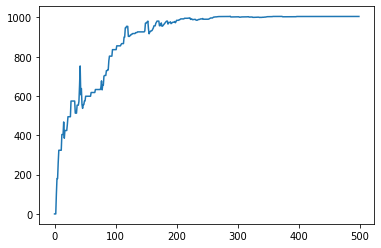

In [19]:
# Normalize the "trained" Q matrix
print ("Trained Q matrix: \n", Q/np.max(Q)*100)

plt.plot(scores)

In [20]:
# Testing
current_state = 2
steps = [current_state]

while current_state != 5:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

# Print selected sequence of steps
print ("Best sequence path: ", steps)

Best sequence path:  [2, 3, 1, 5]
